# estdel

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import hera_cal
import pyuvdata

import estdel

## Estimating the cable delay for a redundant visibility ratio

 Load data

In [2]:
uvd = pyuvdata.UVData()

# data
miriad_path = 'zen_data/zen.2458098.58037.xx.HH.uv'
uvd.read_miriad(miriad_path)

# get the redundant baselines for that data
aa = hera_cal.utils.get_aa_from_uv(uvd)
info = hera_cal.omni.aa_to_info(aa)
red_bls = np.array(info.get_reds())

From one redundant baseline select two unique separations

In [11]:
red_bl = red_bls[np.random.randint(len(red_bls))]
two_seps = [random.sample(red_bl, 2)][0]  
two_seps

[(51, 88), (98, 141)]

Get data for those separations 

In [12]:
data = {}
for sep in two_seps:
    data[sep] = uvd.get_data(sep)

Construct visibility ratio

In [13]:
V = data[two_seps[0]] * data[two_seps[1]].conjugate()

Take a look

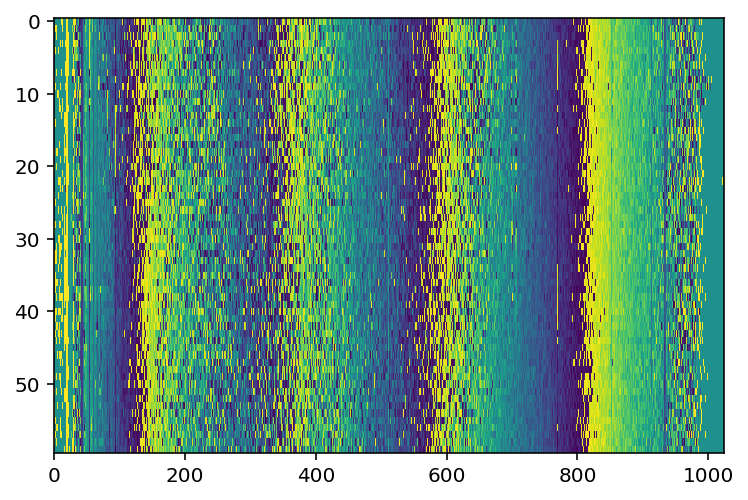

In [14]:
plt.imshow(np.angle(V), aspect = 'auto');

## Predict cable delays for data

In [16]:
predictor = estdel.VratioDelay(V)

In [17]:
predictions = predictor.predict()

`predictor.raw_predictions` are in range -0.0400, 0.0400, unitless, based on 1024 unitless frequency channels.

`predictor.predictions` are converted to nanoseconds based on 100MHz spread over 1024 channels

`predictor.predict(conversion_fn=None)` gives raw_predictions

One visibility should have one overall total cable delay.

In [18]:
print('Mean cable delay for this visibility ratio = {}ns'.format(np.mean(predictions)))

Mean cable delay for this visibility ratio = 47.8082ns


In [19]:
print('Standard deviation of cable delay for this visibility ratio = {}ns'.format(np.std(predictions)))

Standard deviation of cable delay for this visibility ratio = 0.985955962505ns


Plot the angle of each row of the visibility ratio side by side with the prediction

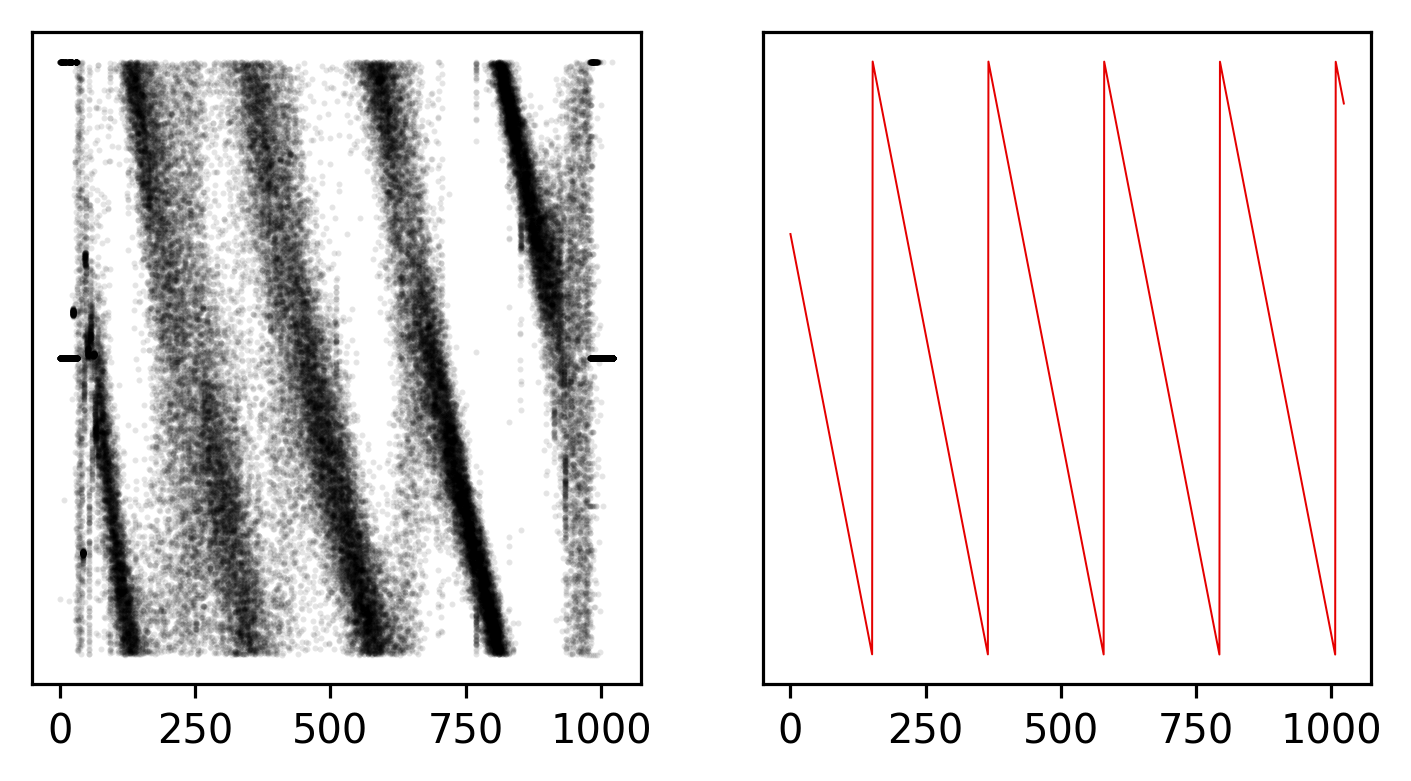

In [20]:
fig, axes = plt.subplots(1,2, figsize = (6,3), dpi = 144)
for row in V:
    axes[0].plot(np.angle(row), ls = 'none', marker = '.', markersize = 1, alpha = 0.1, color = 'black')
axes[1].plot(np.angle(np.exp(-2j*np.pi*(np.linspace(0.100,0.200,1024)*np.mean(predictions) + np.random.uniform()))), color = '#E50000', lw = 0.5)
for ax in axes:
    ax.set_yticks([])
plt.show()